In this exercise, you'll use word vectors trained on a corpus of 380,000 lyrics of songs from MetroLyrics (https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics).  
The dataset contains these fields for each song, in CSV format:
1. index
1. song
1. year
1. artist
1. genre
1. lyrics

Before doing this exercise, we recommend that you go over the "Bag of words meets bag of popcorn" tutorial (https://www.kaggle.com/c/word2vec-nlp-tutorial)

Other recommended resources:
- https://rare-technologies.com/word2vec-tutorial/
- https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

### Train word vectors
Train word vectors using the Skipgram Word2vec algorithm and the gensim package.
Make sure you perform the following:
- Tokenize words
- Lowercase all words
- Remove punctuation marks
- Remove rare words
- Remove stopwords

Use 300 as the dimension of the word vectors. Try different context sizes.

In [1]:
import numpy as np
import pandas as pd
import os
import re
import nltk
from time import time
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import multiprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [5]:
train = pd.read_csv('lyrics.csv', index_col=0)

In [6]:
train.dropna(subset=['lyrics'], inplace=True)

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guyja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stops = set(stopwords.words('english'))
def lyrics_to_words (lyrics):
    letters_only = re.sub("[^a-zA-Z]", " ", lyrics)
    words = letters_only.lower().split()
    meaningful_words = [word for word in words if not word in stops]
    return meaningful_words

In [9]:
t = time()
train['clean_lyrics'] = train.lyrics.apply(lambda x: lyrics_to_words(x))
print('{} mins'.format(round((time() - t) / 60, 2)))

0.57 mins


In [9]:
sentences = train.clean_lyrics.to_list()

In [8]:
w2v_model = Word2Vec(min_count=20,
                     window=5,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=4,
                     sg=1)

In [10]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 11:50:42: collecting all words and their counts
INFO - 11:50:42: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 11:50:42: PROGRESS: at sentence #10000, processed 1147030 words, keeping 56164 word types
INFO - 11:50:43: PROGRESS: at sentence #20000, processed 2369372 words, keeping 91682 word types
INFO - 11:50:43: PROGRESS: at sentence #30000, processed 3538230 words, keeping 107963 word types
INFO - 11:50:43: PROGRESS: at sentence #40000, processed 4799852 words, keeping 130265 word types
INFO - 11:50:43: PROGRESS: at sentence #50000, processed 5939943 words, keeping 151445 word types
INFO - 11:50:44: PROGRESS: at sentence #60000, processed 7172080 words, keeping 169102 word types
INFO - 11:50:44: PROGRESS: at sentence #70000, processed 8313429 words, keeping 184275 word types
INFO - 11:50:44: PROGRESS: at sentence #80000, processed 9500307 words, keeping 197297 word types
INFO - 11:50:44: PROGRESS: at sentence #90000, processed 10810672 words, keeping

Time to build vocab: 0.28 mins


In [11]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 11:52:11: training model with 4 workers on 45511 vocabulary and 300 features, using sg=1 hs=0 sample=6e-05 negative=20 window=5
INFO - 11:52:12: EPOCH 1 - PROGRESS: at 0.29% examples, 65141 words/s, in_qsize 7, out_qsize 0
INFO - 11:52:14: EPOCH 1 - PROGRESS: at 0.73% examples, 73333 words/s, in_qsize 7, out_qsize 0
INFO - 11:52:15: EPOCH 1 - PROGRESS: at 1.26% examples, 71994 words/s, in_qsize 7, out_qsize 0
INFO - 11:52:16: EPOCH 1 - PROGRESS: at 1.91% examples, 74651 words/s, in_qsize 7, out_qsize 0
INFO - 11:52:17: EPOCH 1 - PROGRESS: at 2.30% examples, 75584 words/s, in_qsize 7, out_qsize 0
INFO - 11:52:18: EPOCH 1 - PROGRESS: at 2.73% examples, 76306 words/s, in_qsize 7, out_qsize 0
INFO - 11:52:19: EPOCH 1 - PROGRESS: at 3.31% examples, 76718 words/s, in_qsize 7, out_qsize 0
INFO - 11:52:20: EPOCH 1 - PROGRESS: at 3.90% examples, 77228 words/s, in_qsize 7, out_qsize 0
INFO - 11:52:21: EPOCH 1 - PROGRESS: at 4.38% examples, 77303 words/s, in_qsize 7, out_qsize 0
INFO - 11:

INFO - 11:53:43: EPOCH 1 - PROGRESS: at 37.90% examples, 72526 words/s, in_qsize 7, out_qsize 0
INFO - 11:53:44: EPOCH 1 - PROGRESS: at 38.33% examples, 72522 words/s, in_qsize 7, out_qsize 0
INFO - 11:53:45: EPOCH 1 - PROGRESS: at 38.88% examples, 72580 words/s, in_qsize 7, out_qsize 0
INFO - 11:53:47: EPOCH 1 - PROGRESS: at 39.37% examples, 72649 words/s, in_qsize 7, out_qsize 0
INFO - 11:53:48: EPOCH 1 - PROGRESS: at 39.84% examples, 72606 words/s, in_qsize 7, out_qsize 0
INFO - 11:53:49: EPOCH 1 - PROGRESS: at 40.29% examples, 72600 words/s, in_qsize 7, out_qsize 0
INFO - 11:53:50: EPOCH 1 - PROGRESS: at 40.66% examples, 72509 words/s, in_qsize 8, out_qsize 0
INFO - 11:53:51: EPOCH 1 - PROGRESS: at 41.17% examples, 72421 words/s, in_qsize 7, out_qsize 0
INFO - 11:53:52: EPOCH 1 - PROGRESS: at 41.63% examples, 72496 words/s, in_qsize 7, out_qsize 0
INFO - 11:53:53: EPOCH 1 - PROGRESS: at 41.99% examples, 72529 words/s, in_qsize 7, out_qsize 0
INFO - 11:53:54: EPOCH 1 - PROGRESS: at 

INFO - 11:55:14: EPOCH 1 - PROGRESS: at 75.63% examples, 71690 words/s, in_qsize 7, out_qsize 0
INFO - 11:55:15: EPOCH 1 - PROGRESS: at 75.99% examples, 71743 words/s, in_qsize 7, out_qsize 0
INFO - 11:55:16: EPOCH 1 - PROGRESS: at 76.43% examples, 71766 words/s, in_qsize 7, out_qsize 0
INFO - 11:55:17: EPOCH 1 - PROGRESS: at 76.91% examples, 71798 words/s, in_qsize 7, out_qsize 0
INFO - 11:55:19: EPOCH 1 - PROGRESS: at 77.43% examples, 71774 words/s, in_qsize 7, out_qsize 0
INFO - 11:55:20: EPOCH 1 - PROGRESS: at 77.94% examples, 71759 words/s, in_qsize 7, out_qsize 0
INFO - 11:55:21: EPOCH 1 - PROGRESS: at 78.45% examples, 71761 words/s, in_qsize 7, out_qsize 0
INFO - 11:55:22: EPOCH 1 - PROGRESS: at 78.97% examples, 71781 words/s, in_qsize 7, out_qsize 0
INFO - 11:55:23: EPOCH 1 - PROGRESS: at 79.34% examples, 71786 words/s, in_qsize 7, out_qsize 0
INFO - 11:55:24: EPOCH 1 - PROGRESS: at 79.80% examples, 71746 words/s, in_qsize 7, out_qsize 0
INFO - 11:55:25: EPOCH 1 - PROGRESS: at 

INFO - 11:56:42: EPOCH 2 - PROGRESS: at 11.62% examples, 69122 words/s, in_qsize 8, out_qsize 0
INFO - 11:56:43: EPOCH 2 - PROGRESS: at 11.96% examples, 69052 words/s, in_qsize 7, out_qsize 0
INFO - 11:56:44: EPOCH 2 - PROGRESS: at 12.44% examples, 68875 words/s, in_qsize 7, out_qsize 0
INFO - 11:56:45: EPOCH 2 - PROGRESS: at 12.95% examples, 68859 words/s, in_qsize 7, out_qsize 0
INFO - 11:56:46: EPOCH 2 - PROGRESS: at 13.26% examples, 68261 words/s, in_qsize 7, out_qsize 0
INFO - 11:56:47: EPOCH 2 - PROGRESS: at 13.62% examples, 67492 words/s, in_qsize 7, out_qsize 0
INFO - 11:56:48: EPOCH 2 - PROGRESS: at 13.86% examples, 66884 words/s, in_qsize 7, out_qsize 0
INFO - 11:56:49: EPOCH 2 - PROGRESS: at 14.29% examples, 66614 words/s, in_qsize 7, out_qsize 0
INFO - 11:56:50: EPOCH 2 - PROGRESS: at 14.59% examples, 66517 words/s, in_qsize 7, out_qsize 0
INFO - 11:56:51: EPOCH 2 - PROGRESS: at 14.87% examples, 66401 words/s, in_qsize 7, out_qsize 0
INFO - 11:56:52: EPOCH 2 - PROGRESS: at 

INFO - 11:58:13: EPOCH 2 - PROGRESS: at 48.14% examples, 70368 words/s, in_qsize 7, out_qsize 0
INFO - 11:58:14: EPOCH 2 - PROGRESS: at 48.65% examples, 70395 words/s, in_qsize 8, out_qsize 0
INFO - 11:58:15: EPOCH 2 - PROGRESS: at 49.13% examples, 70440 words/s, in_qsize 7, out_qsize 0
INFO - 11:58:16: EPOCH 2 - PROGRESS: at 49.62% examples, 70453 words/s, in_qsize 7, out_qsize 0
INFO - 11:58:17: EPOCH 2 - PROGRESS: at 50.06% examples, 70499 words/s, in_qsize 7, out_qsize 0
INFO - 11:58:18: EPOCH 2 - PROGRESS: at 50.51% examples, 70565 words/s, in_qsize 7, out_qsize 0
INFO - 11:58:19: EPOCH 2 - PROGRESS: at 51.04% examples, 70579 words/s, in_qsize 7, out_qsize 0
INFO - 11:58:20: EPOCH 2 - PROGRESS: at 51.40% examples, 70609 words/s, in_qsize 7, out_qsize 0
INFO - 11:58:21: EPOCH 2 - PROGRESS: at 51.94% examples, 70684 words/s, in_qsize 7, out_qsize 0
INFO - 11:58:22: EPOCH 2 - PROGRESS: at 52.41% examples, 70664 words/s, in_qsize 7, out_qsize 0
INFO - 11:58:23: EPOCH 2 - PROGRESS: at 

INFO - 11:59:44: EPOCH 2 - PROGRESS: at 87.83% examples, 72287 words/s, in_qsize 7, out_qsize 0
INFO - 11:59:45: EPOCH 2 - PROGRESS: at 88.34% examples, 72292 words/s, in_qsize 7, out_qsize 0
INFO - 11:59:46: EPOCH 2 - PROGRESS: at 88.82% examples, 72318 words/s, in_qsize 7, out_qsize 0
INFO - 11:59:47: EPOCH 2 - PROGRESS: at 89.27% examples, 72308 words/s, in_qsize 7, out_qsize 0
INFO - 11:59:48: EPOCH 2 - PROGRESS: at 89.84% examples, 72326 words/s, in_qsize 7, out_qsize 0
INFO - 11:59:49: EPOCH 2 - PROGRESS: at 90.31% examples, 72350 words/s, in_qsize 7, out_qsize 0
INFO - 11:59:50: EPOCH 2 - PROGRESS: at 90.81% examples, 72353 words/s, in_qsize 7, out_qsize 0
INFO - 11:59:51: EPOCH 2 - PROGRESS: at 91.23% examples, 72364 words/s, in_qsize 7, out_qsize 0
INFO - 11:59:52: EPOCH 2 - PROGRESS: at 91.71% examples, 72378 words/s, in_qsize 7, out_qsize 0
INFO - 11:59:53: EPOCH 2 - PROGRESS: at 92.20% examples, 72374 words/s, in_qsize 7, out_qsize 0
INFO - 11:59:54: EPOCH 2 - PROGRESS: at 

INFO - 12:01:12: EPOCH 3 - PROGRESS: at 25.96% examples, 73883 words/s, in_qsize 7, out_qsize 0
INFO - 12:01:13: EPOCH 3 - PROGRESS: at 26.39% examples, 73916 words/s, in_qsize 7, out_qsize 0
INFO - 12:01:14: EPOCH 3 - PROGRESS: at 26.97% examples, 73871 words/s, in_qsize 7, out_qsize 0
INFO - 12:01:15: EPOCH 3 - PROGRESS: at 27.34% examples, 73919 words/s, in_qsize 7, out_qsize 0
INFO - 12:01:16: EPOCH 3 - PROGRESS: at 27.75% examples, 73842 words/s, in_qsize 7, out_qsize 0
INFO - 12:01:17: EPOCH 3 - PROGRESS: at 28.31% examples, 73872 words/s, in_qsize 7, out_qsize 0
INFO - 12:01:18: EPOCH 3 - PROGRESS: at 28.64% examples, 73913 words/s, in_qsize 7, out_qsize 0
INFO - 12:01:20: EPOCH 3 - PROGRESS: at 29.08% examples, 73866 words/s, in_qsize 7, out_qsize 0
INFO - 12:01:21: EPOCH 3 - PROGRESS: at 29.50% examples, 73818 words/s, in_qsize 8, out_qsize 0
INFO - 12:01:22: EPOCH 3 - PROGRESS: at 30.09% examples, 73871 words/s, in_qsize 8, out_qsize 0
INFO - 12:01:23: EPOCH 3 - PROGRESS: at 

INFO - 12:02:44: EPOCH 3 - PROGRESS: at 65.22% examples, 74165 words/s, in_qsize 7, out_qsize 0
INFO - 12:02:45: EPOCH 3 - PROGRESS: at 65.66% examples, 74140 words/s, in_qsize 7, out_qsize 0
INFO - 12:02:46: EPOCH 3 - PROGRESS: at 66.25% examples, 74177 words/s, in_qsize 7, out_qsize 0
INFO - 12:02:47: EPOCH 3 - PROGRESS: at 66.62% examples, 74189 words/s, in_qsize 7, out_qsize 0
INFO - 12:02:48: EPOCH 3 - PROGRESS: at 67.03% examples, 74166 words/s, in_qsize 7, out_qsize 0
INFO - 12:02:49: EPOCH 3 - PROGRESS: at 67.50% examples, 74192 words/s, in_qsize 7, out_qsize 0
INFO - 12:02:50: EPOCH 3 - PROGRESS: at 67.96% examples, 74217 words/s, in_qsize 7, out_qsize 0
INFO - 12:02:51: EPOCH 3 - PROGRESS: at 68.39% examples, 74202 words/s, in_qsize 7, out_qsize 0
INFO - 12:02:53: EPOCH 3 - PROGRESS: at 68.75% examples, 74255 words/s, in_qsize 7, out_qsize 0
INFO - 12:02:54: EPOCH 3 - PROGRESS: at 69.10% examples, 74123 words/s, in_qsize 8, out_qsize 0
INFO - 12:02:55: EPOCH 3 - PROGRESS: at 

INFO - 12:04:11: EPOCH 4 - PROGRESS: at 2.01% examples, 72878 words/s, in_qsize 7, out_qsize 0
INFO - 12:04:12: EPOCH 4 - PROGRESS: at 2.32% examples, 72554 words/s, in_qsize 7, out_qsize 0
INFO - 12:04:13: EPOCH 4 - PROGRESS: at 2.83% examples, 73758 words/s, in_qsize 7, out_qsize 0
INFO - 12:04:14: EPOCH 4 - PROGRESS: at 3.31% examples, 73478 words/s, in_qsize 7, out_qsize 0
INFO - 12:04:15: EPOCH 4 - PROGRESS: at 3.90% examples, 73803 words/s, in_qsize 7, out_qsize 0
INFO - 12:04:16: EPOCH 4 - PROGRESS: at 4.38% examples, 74363 words/s, in_qsize 7, out_qsize 0
INFO - 12:04:17: EPOCH 4 - PROGRESS: at 4.86% examples, 73905 words/s, in_qsize 7, out_qsize 0
INFO - 12:04:18: EPOCH 4 - PROGRESS: at 5.28% examples, 74317 words/s, in_qsize 7, out_qsize 0
INFO - 12:04:19: EPOCH 4 - PROGRESS: at 5.65% examples, 74815 words/s, in_qsize 7, out_qsize 0
INFO - 12:04:20: EPOCH 4 - PROGRESS: at 6.06% examples, 74039 words/s, in_qsize 7, out_qsize 0
INFO - 12:04:21: EPOCH 4 - PROGRESS: at 6.44% exam

INFO - 12:05:42: EPOCH 4 - PROGRESS: at 40.69% examples, 74478 words/s, in_qsize 7, out_qsize 0
INFO - 12:05:43: EPOCH 4 - PROGRESS: at 41.25% examples, 74384 words/s, in_qsize 7, out_qsize 0
INFO - 12:05:44: EPOCH 4 - PROGRESS: at 41.59% examples, 74200 words/s, in_qsize 7, out_qsize 0
INFO - 12:05:45: EPOCH 4 - PROGRESS: at 41.86% examples, 74041 words/s, in_qsize 7, out_qsize 0
INFO - 12:05:46: EPOCH 4 - PROGRESS: at 42.38% examples, 74103 words/s, in_qsize 7, out_qsize 0
INFO - 12:05:47: EPOCH 4 - PROGRESS: at 42.80% examples, 74007 words/s, in_qsize 7, out_qsize 0
INFO - 12:05:48: EPOCH 4 - PROGRESS: at 43.26% examples, 74043 words/s, in_qsize 7, out_qsize 0
INFO - 12:05:49: EPOCH 4 - PROGRESS: at 43.75% examples, 74048 words/s, in_qsize 7, out_qsize 0
INFO - 12:05:51: EPOCH 4 - PROGRESS: at 44.24% examples, 74107 words/s, in_qsize 7, out_qsize 0
INFO - 12:05:52: EPOCH 4 - PROGRESS: at 44.69% examples, 74078 words/s, in_qsize 7, out_qsize 0
INFO - 12:05:53: EPOCH 4 - PROGRESS: at 

INFO - 12:07:13: EPOCH 4 - PROGRESS: at 79.93% examples, 73963 words/s, in_qsize 7, out_qsize 0
INFO - 12:07:14: EPOCH 4 - PROGRESS: at 80.46% examples, 73963 words/s, in_qsize 7, out_qsize 0
INFO - 12:07:15: EPOCH 4 - PROGRESS: at 80.65% examples, 74001 words/s, in_qsize 7, out_qsize 0
INFO - 12:07:16: EPOCH 4 - PROGRESS: at 81.14% examples, 74020 words/s, in_qsize 7, out_qsize 0
INFO - 12:07:17: EPOCH 4 - PROGRESS: at 81.65% examples, 74015 words/s, in_qsize 7, out_qsize 0
INFO - 12:07:18: EPOCH 4 - PROGRESS: at 82.07% examples, 74039 words/s, in_qsize 8, out_qsize 0
INFO - 12:07:20: EPOCH 4 - PROGRESS: at 82.62% examples, 74036 words/s, in_qsize 7, out_qsize 0
INFO - 12:07:21: EPOCH 4 - PROGRESS: at 83.12% examples, 74077 words/s, in_qsize 7, out_qsize 0
INFO - 12:07:22: EPOCH 4 - PROGRESS: at 83.54% examples, 74052 words/s, in_qsize 7, out_qsize 0
INFO - 12:07:23: EPOCH 4 - PROGRESS: at 84.10% examples, 74046 words/s, in_qsize 7, out_qsize 0
INFO - 12:07:24: EPOCH 4 - PROGRESS: at 

INFO - 12:08:41: EPOCH 5 - PROGRESS: at 17.57% examples, 74633 words/s, in_qsize 7, out_qsize 0
INFO - 12:08:42: EPOCH 5 - PROGRESS: at 18.05% examples, 74650 words/s, in_qsize 7, out_qsize 0
INFO - 12:08:43: EPOCH 5 - PROGRESS: at 18.66% examples, 74796 words/s, in_qsize 7, out_qsize 0
INFO - 12:08:44: EPOCH 5 - PROGRESS: at 19.15% examples, 74809 words/s, in_qsize 7, out_qsize 0
INFO - 12:08:45: EPOCH 5 - PROGRESS: at 19.59% examples, 74813 words/s, in_qsize 7, out_qsize 0
INFO - 12:08:46: EPOCH 5 - PROGRESS: at 20.00% examples, 74810 words/s, in_qsize 7, out_qsize 0
INFO - 12:08:47: EPOCH 5 - PROGRESS: at 20.50% examples, 74852 words/s, in_qsize 7, out_qsize 0
INFO - 12:08:48: EPOCH 5 - PROGRESS: at 21.01% examples, 74857 words/s, in_qsize 7, out_qsize 0
INFO - 12:08:50: EPOCH 5 - PROGRESS: at 21.48% examples, 74833 words/s, in_qsize 7, out_qsize 0
INFO - 12:08:51: EPOCH 5 - PROGRESS: at 21.95% examples, 74897 words/s, in_qsize 7, out_qsize 0
INFO - 12:08:52: EPOCH 5 - PROGRESS: at 

INFO - 12:10:12: EPOCH 5 - PROGRESS: at 56.94% examples, 75119 words/s, in_qsize 7, out_qsize 0
INFO - 12:10:13: EPOCH 5 - PROGRESS: at 57.40% examples, 75175 words/s, in_qsize 7, out_qsize 0
INFO - 12:10:14: EPOCH 5 - PROGRESS: at 57.91% examples, 75207 words/s, in_qsize 8, out_qsize 0
INFO - 12:10:15: EPOCH 5 - PROGRESS: at 58.35% examples, 75185 words/s, in_qsize 7, out_qsize 0
INFO - 12:10:17: EPOCH 5 - PROGRESS: at 58.86% examples, 75214 words/s, in_qsize 7, out_qsize 0
INFO - 12:10:18: EPOCH 5 - PROGRESS: at 59.32% examples, 75204 words/s, in_qsize 7, out_qsize 0
INFO - 12:10:19: EPOCH 5 - PROGRESS: at 59.82% examples, 75187 words/s, in_qsize 7, out_qsize 0
INFO - 12:10:20: EPOCH 5 - PROGRESS: at 60.37% examples, 75230 words/s, in_qsize 7, out_qsize 0
INFO - 12:10:21: EPOCH 5 - PROGRESS: at 60.88% examples, 75231 words/s, in_qsize 7, out_qsize 0
INFO - 12:10:22: EPOCH 5 - PROGRESS: at 61.31% examples, 75199 words/s, in_qsize 7, out_qsize 0
INFO - 12:10:23: EPOCH 5 - PROGRESS: at 

INFO - 12:11:43: EPOCH 5 - PROGRESS: at 96.61% examples, 75117 words/s, in_qsize 7, out_qsize 0
INFO - 12:11:44: EPOCH 5 - PROGRESS: at 97.02% examples, 75136 words/s, in_qsize 7, out_qsize 0
INFO - 12:11:45: EPOCH 5 - PROGRESS: at 97.47% examples, 75174 words/s, in_qsize 7, out_qsize 0
INFO - 12:11:47: EPOCH 5 - PROGRESS: at 97.91% examples, 75141 words/s, in_qsize 7, out_qsize 0
INFO - 12:11:48: EPOCH 5 - PROGRESS: at 98.39% examples, 75143 words/s, in_qsize 7, out_qsize 0
INFO - 12:11:49: EPOCH 5 - PROGRESS: at 98.81% examples, 75144 words/s, in_qsize 8, out_qsize 0
INFO - 12:11:50: EPOCH 5 - PROGRESS: at 99.20% examples, 75152 words/s, in_qsize 7, out_qsize 0
INFO - 12:11:51: EPOCH 5 - PROGRESS: at 99.58% examples, 75157 words/s, in_qsize 7, out_qsize 0
INFO - 12:11:51: worker thread finished; awaiting finish of 3 more threads
INFO - 12:11:51: worker thread finished; awaiting finish of 2 more threads
INFO - 12:11:51: worker thread finished; awaiting finish of 1 more threads
INFO - 

INFO - 12:13:11: EPOCH 6 - PROGRESS: at 34.21% examples, 74305 words/s, in_qsize 7, out_qsize 0
INFO - 12:13:12: EPOCH 6 - PROGRESS: at 34.47% examples, 74352 words/s, in_qsize 7, out_qsize 0
INFO - 12:13:13: EPOCH 6 - PROGRESS: at 34.73% examples, 74305 words/s, in_qsize 7, out_qsize 0
INFO - 12:13:14: EPOCH 6 - PROGRESS: at 35.01% examples, 74287 words/s, in_qsize 7, out_qsize 0
INFO - 12:13:15: EPOCH 6 - PROGRESS: at 35.44% examples, 74312 words/s, in_qsize 7, out_qsize 0
INFO - 12:13:16: EPOCH 6 - PROGRESS: at 35.96% examples, 74337 words/s, in_qsize 7, out_qsize 0
INFO - 12:13:17: EPOCH 6 - PROGRESS: at 36.36% examples, 74337 words/s, in_qsize 7, out_qsize 0
INFO - 12:13:18: EPOCH 6 - PROGRESS: at 36.86% examples, 74336 words/s, in_qsize 7, out_qsize 0
INFO - 12:13:19: EPOCH 6 - PROGRESS: at 37.27% examples, 74386 words/s, in_qsize 7, out_qsize 0
INFO - 12:13:20: EPOCH 6 - PROGRESS: at 37.61% examples, 74381 words/s, in_qsize 7, out_qsize 0
INFO - 12:13:21: EPOCH 6 - PROGRESS: at 

INFO - 12:14:42: EPOCH 6 - PROGRESS: at 73.31% examples, 74609 words/s, in_qsize 7, out_qsize 0
INFO - 12:14:43: EPOCH 6 - PROGRESS: at 73.68% examples, 74674 words/s, in_qsize 7, out_qsize 0
INFO - 12:14:44: EPOCH 6 - PROGRESS: at 74.27% examples, 74675 words/s, in_qsize 7, out_qsize 0
INFO - 12:14:45: EPOCH 6 - PROGRESS: at 74.87% examples, 74665 words/s, in_qsize 7, out_qsize 0
INFO - 12:14:47: EPOCH 6 - PROGRESS: at 75.33% examples, 74665 words/s, in_qsize 8, out_qsize 0
INFO - 12:14:48: EPOCH 6 - PROGRESS: at 75.79% examples, 74679 words/s, in_qsize 7, out_qsize 0
INFO - 12:14:49: EPOCH 6 - PROGRESS: at 76.22% examples, 74692 words/s, in_qsize 7, out_qsize 0
INFO - 12:14:50: EPOCH 6 - PROGRESS: at 76.72% examples, 74703 words/s, in_qsize 7, out_qsize 0
INFO - 12:14:51: EPOCH 6 - PROGRESS: at 77.24% examples, 74712 words/s, in_qsize 8, out_qsize 0
INFO - 12:14:52: EPOCH 6 - PROGRESS: at 77.83% examples, 74728 words/s, in_qsize 7, out_qsize 0
INFO - 12:14:53: EPOCH 6 - PROGRESS: at 

INFO - 12:16:10: EPOCH 7 - PROGRESS: at 10.85% examples, 75059 words/s, in_qsize 8, out_qsize 0
INFO - 12:16:11: EPOCH 7 - PROGRESS: at 11.24% examples, 74938 words/s, in_qsize 7, out_qsize 0
INFO - 12:16:12: EPOCH 7 - PROGRESS: at 11.59% examples, 74822 words/s, in_qsize 8, out_qsize 1
INFO - 12:16:13: EPOCH 7 - PROGRESS: at 11.99% examples, 74838 words/s, in_qsize 7, out_qsize 0
INFO - 12:16:14: EPOCH 7 - PROGRESS: at 12.57% examples, 74869 words/s, in_qsize 7, out_qsize 0
INFO - 12:16:15: EPOCH 7 - PROGRESS: at 13.04% examples, 74967 words/s, in_qsize 7, out_qsize 0
INFO - 12:16:16: EPOCH 7 - PROGRESS: at 13.62% examples, 74952 words/s, in_qsize 7, out_qsize 0
INFO - 12:16:17: EPOCH 7 - PROGRESS: at 14.02% examples, 74907 words/s, in_qsize 7, out_qsize 0
INFO - 12:16:18: EPOCH 7 - PROGRESS: at 14.54% examples, 74739 words/s, in_qsize 7, out_qsize 0
INFO - 12:16:19: EPOCH 7 - PROGRESS: at 14.86% examples, 75043 words/s, in_qsize 7, out_qsize 0
INFO - 12:16:21: EPOCH 7 - PROGRESS: at 

INFO - 12:17:42: EPOCH 7 - PROGRESS: at 49.70% examples, 74961 words/s, in_qsize 7, out_qsize 0
INFO - 12:17:43: EPOCH 7 - PROGRESS: at 50.18% examples, 74988 words/s, in_qsize 8, out_qsize 0
INFO - 12:17:44: EPOCH 7 - PROGRESS: at 50.69% examples, 75026 words/s, in_qsize 7, out_qsize 0
INFO - 12:17:45: EPOCH 7 - PROGRESS: at 51.10% examples, 74972 words/s, in_qsize 8, out_qsize 0
INFO - 12:17:46: EPOCH 7 - PROGRESS: at 51.56% examples, 74987 words/s, in_qsize 7, out_qsize 0
INFO - 12:17:47: EPOCH 7 - PROGRESS: at 52.05% examples, 74970 words/s, in_qsize 7, out_qsize 0
INFO - 12:17:48: EPOCH 7 - PROGRESS: at 52.53% examples, 74953 words/s, in_qsize 7, out_qsize 0
INFO - 12:17:49: EPOCH 7 - PROGRESS: at 53.00% examples, 74959 words/s, in_qsize 7, out_qsize 0
INFO - 12:17:50: EPOCH 7 - PROGRESS: at 53.46% examples, 74986 words/s, in_qsize 7, out_qsize 0
INFO - 12:17:51: EPOCH 7 - PROGRESS: at 53.88% examples, 74998 words/s, in_qsize 7, out_qsize 0
INFO - 12:17:52: EPOCH 7 - PROGRESS: at 

INFO - 12:19:13: EPOCH 7 - PROGRESS: at 89.97% examples, 75115 words/s, in_qsize 7, out_qsize 0
INFO - 12:19:14: EPOCH 7 - PROGRESS: at 90.44% examples, 75099 words/s, in_qsize 7, out_qsize 0
INFO - 12:19:15: EPOCH 7 - PROGRESS: at 90.97% examples, 75107 words/s, in_qsize 7, out_qsize 0
INFO - 12:19:16: EPOCH 7 - PROGRESS: at 91.52% examples, 75105 words/s, in_qsize 7, out_qsize 0
INFO - 12:19:17: EPOCH 7 - PROGRESS: at 91.96% examples, 75152 words/s, in_qsize 8, out_qsize 0
INFO - 12:19:18: EPOCH 7 - PROGRESS: at 92.54% examples, 75147 words/s, in_qsize 7, out_qsize 0
INFO - 12:19:19: EPOCH 7 - PROGRESS: at 93.00% examples, 75117 words/s, in_qsize 7, out_qsize 0
INFO - 12:19:20: EPOCH 7 - PROGRESS: at 93.53% examples, 75141 words/s, in_qsize 7, out_qsize 0
INFO - 12:19:21: EPOCH 7 - PROGRESS: at 93.95% examples, 75115 words/s, in_qsize 7, out_qsize 0
INFO - 12:19:22: EPOCH 7 - PROGRESS: at 94.35% examples, 75123 words/s, in_qsize 7, out_qsize 0
INFO - 12:19:24: EPOCH 7 - PROGRESS: at 

INFO - 12:20:41: EPOCH 8 - PROGRESS: at 27.73% examples, 73954 words/s, in_qsize 7, out_qsize 0
INFO - 12:20:42: EPOCH 8 - PROGRESS: at 28.23% examples, 74046 words/s, in_qsize 7, out_qsize 0
INFO - 12:20:43: EPOCH 8 - PROGRESS: at 28.53% examples, 73944 words/s, in_qsize 7, out_qsize 0
INFO - 12:20:44: EPOCH 8 - PROGRESS: at 28.95% examples, 73954 words/s, in_qsize 7, out_qsize 0
INFO - 12:20:45: EPOCH 8 - PROGRESS: at 29.37% examples, 73902 words/s, in_qsize 7, out_qsize 0
INFO - 12:20:46: EPOCH 8 - PROGRESS: at 29.92% examples, 73946 words/s, in_qsize 7, out_qsize 0
INFO - 12:20:47: EPOCH 8 - PROGRESS: at 30.44% examples, 73998 words/s, in_qsize 7, out_qsize 0
INFO - 12:20:48: EPOCH 8 - PROGRESS: at 30.88% examples, 74007 words/s, in_qsize 7, out_qsize 0
INFO - 12:20:49: EPOCH 8 - PROGRESS: at 31.36% examples, 73918 words/s, in_qsize 7, out_qsize 0
INFO - 12:20:50: EPOCH 8 - PROGRESS: at 31.79% examples, 74070 words/s, in_qsize 7, out_qsize 0
INFO - 12:20:51: EPOCH 8 - PROGRESS: at 

INFO - 12:22:13: EPOCH 8 - PROGRESS: at 67.29% examples, 74325 words/s, in_qsize 7, out_qsize 0
INFO - 12:22:14: EPOCH 8 - PROGRESS: at 67.73% examples, 74338 words/s, in_qsize 7, out_qsize 0
INFO - 12:22:15: EPOCH 8 - PROGRESS: at 68.11% examples, 74347 words/s, in_qsize 7, out_qsize 0
INFO - 12:22:16: EPOCH 8 - PROGRESS: at 68.51% examples, 74361 words/s, in_qsize 7, out_qsize 0
INFO - 12:22:17: EPOCH 8 - PROGRESS: at 68.83% examples, 74336 words/s, in_qsize 7, out_qsize 0
INFO - 12:22:18: EPOCH 8 - PROGRESS: at 69.26% examples, 74377 words/s, in_qsize 7, out_qsize 0
INFO - 12:22:19: EPOCH 8 - PROGRESS: at 69.72% examples, 74308 words/s, in_qsize 7, out_qsize 0
INFO - 12:22:20: EPOCH 8 - PROGRESS: at 70.17% examples, 74348 words/s, in_qsize 7, out_qsize 0
INFO - 12:22:21: EPOCH 8 - PROGRESS: at 70.64% examples, 74321 words/s, in_qsize 8, out_qsize 1
INFO - 12:22:23: EPOCH 8 - PROGRESS: at 71.07% examples, 74324 words/s, in_qsize 7, out_qsize 0
INFO - 12:22:24: EPOCH 8 - PROGRESS: at 

INFO - 12:23:41: EPOCH 9 - PROGRESS: at 4.78% examples, 73302 words/s, in_qsize 7, out_qsize 0
INFO - 12:23:42: EPOCH 9 - PROGRESS: at 5.20% examples, 73347 words/s, in_qsize 7, out_qsize 0
INFO - 12:23:43: EPOCH 9 - PROGRESS: at 5.54% examples, 73812 words/s, in_qsize 7, out_qsize 0
INFO - 12:23:44: EPOCH 9 - PROGRESS: at 5.93% examples, 73307 words/s, in_qsize 8, out_qsize 0
INFO - 12:23:45: EPOCH 9 - PROGRESS: at 6.28% examples, 73909 words/s, in_qsize 7, out_qsize 0
INFO - 12:23:46: EPOCH 9 - PROGRESS: at 6.84% examples, 73764 words/s, in_qsize 7, out_qsize 0
INFO - 12:23:47: EPOCH 9 - PROGRESS: at 7.35% examples, 73785 words/s, in_qsize 8, out_qsize 0
INFO - 12:23:48: EPOCH 9 - PROGRESS: at 7.71% examples, 73540 words/s, in_qsize 7, out_qsize 0
INFO - 12:23:49: EPOCH 9 - PROGRESS: at 8.28% examples, 73616 words/s, in_qsize 7, out_qsize 0
INFO - 12:23:50: EPOCH 9 - PROGRESS: at 8.88% examples, 73895 words/s, in_qsize 7, out_qsize 0
INFO - 12:23:52: EPOCH 9 - PROGRESS: at 9.12% exam

INFO - 12:25:13: EPOCH 9 - PROGRESS: at 43.30% examples, 73986 words/s, in_qsize 7, out_qsize 0
INFO - 12:25:14: EPOCH 9 - PROGRESS: at 43.77% examples, 73992 words/s, in_qsize 7, out_qsize 0
INFO - 12:25:15: EPOCH 9 - PROGRESS: at 44.31% examples, 74008 words/s, in_qsize 7, out_qsize 0
INFO - 12:25:16: EPOCH 9 - PROGRESS: at 44.75% examples, 73999 words/s, in_qsize 8, out_qsize 0
INFO - 12:25:17: EPOCH 9 - PROGRESS: at 45.30% examples, 74007 words/s, in_qsize 7, out_qsize 0
INFO - 12:25:18: EPOCH 9 - PROGRESS: at 45.76% examples, 74009 words/s, in_qsize 8, out_qsize 0
INFO - 12:25:19: EPOCH 9 - PROGRESS: at 46.27% examples, 74079 words/s, in_qsize 7, out_qsize 0
INFO - 12:25:21: EPOCH 9 - PROGRESS: at 46.75% examples, 74109 words/s, in_qsize 7, out_qsize 0
INFO - 12:25:22: EPOCH 9 - PROGRESS: at 47.00% examples, 74045 words/s, in_qsize 7, out_qsize 0
INFO - 12:25:23: EPOCH 9 - PROGRESS: at 47.43% examples, 73949 words/s, in_qsize 8, out_qsize 0
INFO - 12:25:24: EPOCH 9 - PROGRESS: at 

INFO - 12:26:45: EPOCH 9 - PROGRESS: at 83.28% examples, 74128 words/s, in_qsize 7, out_qsize 0
INFO - 12:26:46: EPOCH 9 - PROGRESS: at 83.69% examples, 74130 words/s, in_qsize 7, out_qsize 0
INFO - 12:26:47: EPOCH 9 - PROGRESS: at 84.23% examples, 74113 words/s, in_qsize 7, out_qsize 0
INFO - 12:26:48: EPOCH 9 - PROGRESS: at 84.74% examples, 74131 words/s, in_qsize 7, out_qsize 0
INFO - 12:26:49: EPOCH 9 - PROGRESS: at 85.22% examples, 74113 words/s, in_qsize 7, out_qsize 0
INFO - 12:26:50: EPOCH 9 - PROGRESS: at 85.65% examples, 74118 words/s, in_qsize 7, out_qsize 0
INFO - 12:26:51: EPOCH 9 - PROGRESS: at 86.17% examples, 74116 words/s, in_qsize 7, out_qsize 0
INFO - 12:26:52: EPOCH 9 - PROGRESS: at 86.47% examples, 74098 words/s, in_qsize 7, out_qsize 0
INFO - 12:26:53: EPOCH 9 - PROGRESS: at 86.62% examples, 74125 words/s, in_qsize 7, out_qsize 0
INFO - 12:26:54: EPOCH 9 - PROGRESS: at 87.02% examples, 74080 words/s, in_qsize 7, out_qsize 0
INFO - 12:26:56: EPOCH 9 - PROGRESS: at 

INFO - 12:28:11: EPOCH 10 - PROGRESS: at 20.23% examples, 74180 words/s, in_qsize 7, out_qsize 0
INFO - 12:28:12: EPOCH 10 - PROGRESS: at 20.73% examples, 74228 words/s, in_qsize 7, out_qsize 0
INFO - 12:28:13: EPOCH 10 - PROGRESS: at 21.27% examples, 74188 words/s, in_qsize 7, out_qsize 0
INFO - 12:28:15: EPOCH 10 - PROGRESS: at 21.75% examples, 74271 words/s, in_qsize 7, out_qsize 0
INFO - 12:28:16: EPOCH 10 - PROGRESS: at 22.14% examples, 74240 words/s, in_qsize 7, out_qsize 0
INFO - 12:28:17: EPOCH 10 - PROGRESS: at 22.49% examples, 74152 words/s, in_qsize 7, out_qsize 0
INFO - 12:28:18: EPOCH 10 - PROGRESS: at 22.91% examples, 74199 words/s, in_qsize 7, out_qsize 0
INFO - 12:28:19: EPOCH 10 - PROGRESS: at 23.36% examples, 74297 words/s, in_qsize 7, out_qsize 0
INFO - 12:28:20: EPOCH 10 - PROGRESS: at 23.96% examples, 74208 words/s, in_qsize 7, out_qsize 0
INFO - 12:28:21: EPOCH 10 - PROGRESS: at 24.45% examples, 74195 words/s, in_qsize 7, out_qsize 0
INFO - 12:28:22: EPOCH 10 - PR

INFO - 12:29:42: EPOCH 10 - PROGRESS: at 58.76% examples, 74371 words/s, in_qsize 7, out_qsize 0
INFO - 12:29:43: EPOCH 10 - PROGRESS: at 59.24% examples, 74392 words/s, in_qsize 7, out_qsize 0
INFO - 12:29:44: EPOCH 10 - PROGRESS: at 59.71% examples, 74389 words/s, in_qsize 7, out_qsize 0
INFO - 12:29:45: EPOCH 10 - PROGRESS: at 60.23% examples, 74377 words/s, in_qsize 7, out_qsize 0
INFO - 12:29:46: EPOCH 10 - PROGRESS: at 60.80% examples, 74388 words/s, in_qsize 7, out_qsize 0
INFO - 12:29:47: EPOCH 10 - PROGRESS: at 61.27% examples, 74410 words/s, in_qsize 7, out_qsize 0
INFO - 12:29:48: EPOCH 10 - PROGRESS: at 61.66% examples, 74366 words/s, in_qsize 7, out_qsize 0
INFO - 12:29:49: EPOCH 10 - PROGRESS: at 62.19% examples, 74348 words/s, in_qsize 7, out_qsize 0
INFO - 12:29:50: EPOCH 10 - PROGRESS: at 62.55% examples, 74378 words/s, in_qsize 8, out_qsize 0
INFO - 12:29:51: EPOCH 10 - PROGRESS: at 63.05% examples, 74390 words/s, in_qsize 7, out_qsize 0
INFO - 12:29:52: EPOCH 10 - PR

INFO - 12:31:12: EPOCH 10 - PROGRESS: at 97.30% examples, 74193 words/s, in_qsize 7, out_qsize 0
INFO - 12:31:13: EPOCH 10 - PROGRESS: at 97.77% examples, 74168 words/s, in_qsize 7, out_qsize 0
INFO - 12:31:14: EPOCH 10 - PROGRESS: at 98.23% examples, 74172 words/s, in_qsize 7, out_qsize 0
INFO - 12:31:15: EPOCH 10 - PROGRESS: at 98.70% examples, 74184 words/s, in_qsize 7, out_qsize 0
INFO - 12:31:16: EPOCH 10 - PROGRESS: at 99.08% examples, 74195 words/s, in_qsize 7, out_qsize 0
INFO - 12:31:17: EPOCH 10 - PROGRESS: at 99.44% examples, 74200 words/s, in_qsize 7, out_qsize 0
INFO - 12:31:18: worker thread finished; awaiting finish of 3 more threads
INFO - 12:31:18: worker thread finished; awaiting finish of 2 more threads
INFO - 12:31:18: EPOCH 10 - PROGRESS: at 99.97% examples, 74164 words/s, in_qsize 1, out_qsize 1
INFO - 12:31:18: worker thread finished; awaiting finish of 1 more threads
INFO - 12:31:18: worker thread finished; awaiting finish of 0 more threads
INFO - 12:31:18: EPOC

Time to train the model: 39.12 mins


In [12]:
w2v_model.init_sims(replace=True)

INFO - 12:47:39: precomputing L2-norms of word weight vectors


In [61]:
w2v_model.save('myModel')

INFO - 13:33:12: saving Word2Vec object under myModel, separately None
INFO - 13:33:12: storing np array 'vectors' to myModel.wv.vectors.npy
INFO - 13:33:12: not storing attribute vectors_norm
INFO - 13:33:12: storing np array 'syn1neg' to myModel.trainables.syn1neg.npy
INFO - 13:33:13: not storing attribute cum_table
INFO - 13:33:13: saved myModel


In [ ]:
# w2v_model.load("myModel")

### Review most similar words
Get initial evaluation of the word vectors by analyzing the most similar words for a few interesting words in the text. 

Choose words yourself, and find the most similar words to them.

In [30]:
w2v_model.wv.similar_by_word('baby')

[('girl', 0.6914542317390442),
 ('know', 0.6750094294548035),
 ('cause', 0.6633392572402954),
 ('love', 0.6520190238952637),
 ('want', 0.64468914270401),
 ('gonna', 0.6335924863815308),
 ('yeah', 0.6124570369720459),
 ('wanna', 0.606674075126648),
 ('babe', 0.6063681840896606),
 ('need', 0.6033570170402527)]

In [31]:
w2v_model.wv.similar_by_word('love')

[('know', 0.6749049425125122),
 ('baby', 0.6520190238952637),
 ('cause', 0.632463812828064),
 ('heart', 0.6256372928619385),
 ('never', 0.623978853225708),
 ('ever', 0.6213364005088806),
 ('want', 0.6139873266220093),
 ('could', 0.6105501055717468),
 ('true', 0.6101497411727905),
 ('need', 0.599947988986969)]

In [32]:
w2v_model.wv.similar_by_word('rock')

[('roll', 0.661760151386261),
 ('rockin', 0.5168827176094055),
 ('rocking', 0.48965007066726685),
 ('poping', 0.4701690077781677),
 ('rocked', 0.4578327536582947),
 ('bopped', 0.44584155082702637),
 ('prancin', 0.43837040662765503),
 ('knockers', 0.43747857213020325),
 ('nali', 0.43513792753219604),
 ('dance', 0.4307613968849182)]

In [33]:
w2v_model.wv.similar_by_word('shit')

[('nigga', 0.7748235464096069),
 ('niggas', 0.7626175880432129),
 ('bitch', 0.7616089582443237),
 ('fuck', 0.7495070099830627),
 ('niggaz', 0.701326310634613),
 ('fuckin', 0.6841731071472168),
 ('spit', 0.6497690081596375),
 ('bitches', 0.6458190679550171),
 ('ass', 0.6368974447250366),
 ('wit', 0.6213893890380859)]

### Word Vectors Algebra
We've seen in class examples of algebraic games on the word vectors (e.g. man - woman + king = queen ). 

Try a few vector algebra terms, and evaluate how well they work. Try to use the Cosine distance and compare it to the Euclidean distance.

In [52]:
w2v_model.wv.most_similar(positive=['king','woman'], negative=['man'])

[('queen', 0.45773229002952576),
 ('matchless', 0.42690056562423706),
 ('herod', 0.4184768795967102),
 ('crown', 0.4121778607368469),
 ('throne', 0.3977009654045105),
 ('enthrone', 0.3905608057975769),
 ('uncrowned', 0.3817030191421509),
 ('rouser', 0.37728142738342285),
 ('born', 0.3684556484222412),
 ('kings', 0.36811208724975586)]

In [69]:
w2v_model.wv.most_similar(positive=['death', 'love'])

[('life', 0.6900326013565063),
 ('cause', 0.6553061008453369),
 ('never', 0.6414809226989746),
 ('know', 0.6310535669326782),
 ('one', 0.6071457862854004),
 ('us', 0.6050534844398499),
 ('breath', 0.6044527888298035),
 ('still', 0.6035528182983398),
 ('time', 0.6034831404685974),
 ('fear', 0.5981247425079346)]

In [53]:
w2v_model.wv.most_similar(positive=['niggas','woman'], negative=['man'])

[('bitches', 0.5909149646759033),
 ('nigga', 0.5726217031478882),
 ('niggaz', 0.5465351939201355),
 ('hoes', 0.5419505834579468),
 ('motherfuckers', 0.4734286069869995),
 ('bitch', 0.45840224623680115),
 ('ass', 0.4530482590198517),
 ('wit', 0.45033764839172363),
 ('shit', 0.4501658082008362),
 ('gon', 0.42808282375335693)]

## Sentiment Analysis
Estimate sentiment of words using word vectors.  
In this section, we'll use the SemEval-2015 English Twitter Sentiment Lexicon.  
The lexicon was used as an official test set in the SemEval-2015 shared Task #10: Subtask E, and contains a polarity score for words in range -1 (negative) to 1 (positive) - http://saifmohammad.com/WebPages/SCL.html#OPP

Build a classifier for the sentiment of a word given its word vector. Split the data to a train and test sets, and report the model performance on both sets.

In [37]:
twitter_df = pd.read_csv(r'SemEval2015-English-Twitter-Lexicon/SemEval2015-English-Twitter-Lexicon.txt', delimiter='\t', header=None, names=('Score', 'Word'))

In [41]:
twitter_df.tail()

,Score,Word
1510,-0.969,abuse
1511,-0.969,#failure
1512,-0.982,kill
1513,-0.984,bitches
1514,-0.984,#disappointment


In [100]:
twitter_df['Clean Word'] = twitter_df.Word.apply(lambda x: re.sub("[^a-zA-Z]", "", x))

In [101]:
twitter_df.head()

,Score,Word,Clean Word
0,0.984,loves,loves
1,0.984,#inspirational,inspirational
2,0.969,amazing,amazing
3,0.969,#peaceful,peaceful
4,0.953,#greatness,greatness


In [129]:
twitter_df['Vector'] = twitter_df['Clean Word'].apply(lambda x: w2v_model.wv[x] if x in w2v_model.wv.vocab else None)

In [134]:
twitter_df.dropna(subset=['Vector'], inplace=True)

In [180]:
from sklearn.ensemble import RandomForestRegressor

In [185]:
forest = RandomForestRegressor(n_estimators=100)

In [150]:
y = twitter_df.Score.to_numpy()

In [174]:
X = np.array(twitter_df.Vector.to_list())

In [176]:
X.shape

(1024, 300)

In [178]:
y.shape

(1024,)

In [13]:
from sklearn.model_selection import train_test_split

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [186]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [187]:
y_pred = forest.predict(X_test)

In [188]:
forest.score(X_train,y_train), forest.score(X_test,y_test)

(0.9148638786968153, 0.3680895997952378)

In [14]:
import matplotlib.pyplot as plt

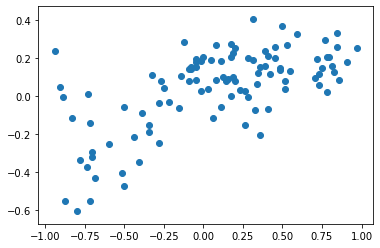

In [190]:
plt.scatter(y_test,y_pred)

Use your trained model from the previous question to predict the sentiment score of words in the lyrics corpus that are not part of the original sentiment dataset. Review the words with the highest positive and negative sentiment. Do the results make sense?

In [350]:
my_dict = {word:w2v_model.wv[word] for word in w2v_model.wv.vocab.keys()}

In [351]:
df = pd.DataFrame.from_dict(my_dict, orient='index')

In [352]:
df['sentiment_score'] = None

In [353]:
for index, row in df.iterrows():
    if index not in twitter_df['Clean Word'].values:
        df.loc[index,'sentiment_score'] = forest.predict(row[:-1].to_numpy().reshape(1,-1))

In [354]:
df[df.sentiment_score.notnull()].sort_values(by=['sentiment_score'], ascending=False).sentiment_score

starbright      0.501456
nearness        0.490368
kalimba         0.469175
amapola         0.463032
milkyway        0.461313
                  ...   
disemboweled   -0.511872
despicable     -0.527787
rancid         -0.536715
malediction    -0.539277
sickens        -0.549637
Name: sentiment_score, Length: 44574, dtype: object

Sentiment analysis kind of worked. The negative sentiment seems to make sense, the positive less so...

### Visualize Word Vectors
In this section, you'll plot words on a 2D grid based on their inner similarity. We'll use the tSNE transformation to reduce dimensions from 300 to 2. You can get sample code from https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial or other tutorials online.

Perform the following:
- Keep only the 3,000 most frequent words (after removing stopwords)
- For this list, compute for each word its relative abundance in each of the genres
- Compute the ratio between the proportion of each word in each genre and the proportion of the word in the entire corpus (the background distribution)
- Pick the top 50 words for each genre. These words give good indication for that genre. Join the words from all genres into a single list of top significant words. 
- Compute tSNE transformation to 2D for all words, based on their word vectors
- Plot the list of the top significant words in 2D. Next to each word output its text. The color of each point should indicate the genre for which it is most significant.

You might prefer to use a different number of points or a slightly different methodology for improved results.  
Analyze the results.

In [10]:
w2v_model = Word2Vec.load('myModel')

INFO - 16:11:50: loading Word2Vec object from myModel
INFO - 16:11:50: loading wv recursively from myModel.wv.* with mmap=None
INFO - 16:11:50: loading vectors from myModel.wv.vectors.npy with mmap=None
INFO - 16:11:51: setting ignored attribute vectors_norm to None
INFO - 16:11:51: loading vocabulary recursively from myModel.vocabulary.* with mmap=None
INFO - 16:11:51: loading trainables recursively from myModel.trainables.* with mmap=None
INFO - 16:11:51: loading syn1neg from myModel.trainables.syn1neg.npy with mmap=None
INFO - 16:11:52: setting ignored attribute cum_table to None
INFO - 16:11:52: loaded myModel


In [322]:
genres = np.unique(train.genre.values)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
vectorizer = CountVectorizer(stop_words='english', max_features=3000)
mostFreqWords = vectorizer.fit_transform(train.clean_lyrics.apply(lambda x: (' '.join(x))).values)

In [43]:
mostFreqWords = mostFreqWords.toarray()

In [44]:
mostFreqWords.shape

(266557, 3000)

In [52]:
wordAbundancePerGenre = np.zeros((len(genres),mostFreqWords.shape[1]))
wordAbundanceTotal = mostFreqWords.sum(axis=0)

for i, genre in enumerate(genres):
    idx = np.argwhere(train.genre.values == genre)
    wordAbundancePerGenre[i,:] = mostFreqWords[idx,:].sum(axis=0) / wordAbundanceTotal

In [66]:
wordAbundancePerGenre.shape

(12, 3000)

In [61]:
Words = np.array(list(vectorizer.vocabulary_.keys()))

In [77]:
Words.shape

(3000,)

In [144]:
top50idx = np.argsort(wordAbundancePerGenre)
top50WordsPerGenre = Words[top50idx[:,-50:]]

In [145]:
top50WordsPerGenre.shape

(12, 50)

In [146]:
topSignificantWords = top50WordsPerGenre.flatten()

In [147]:
topSignificantVectors = []

for word in topSignificantWords:
    if word in w2v_model.wv.vocab:
        topSignificantVectors.append(w2v_model.wv[word])

In [148]:
topSignificantVectors = np.array(topSignificantVectors)

In [149]:
topSignificantVectors.shape

(600, 300)

In [150]:
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

reduc = PCA(n_components=50).fit_transform(topSignificantVectors)
np.set_printoptions(suppress=True)
Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

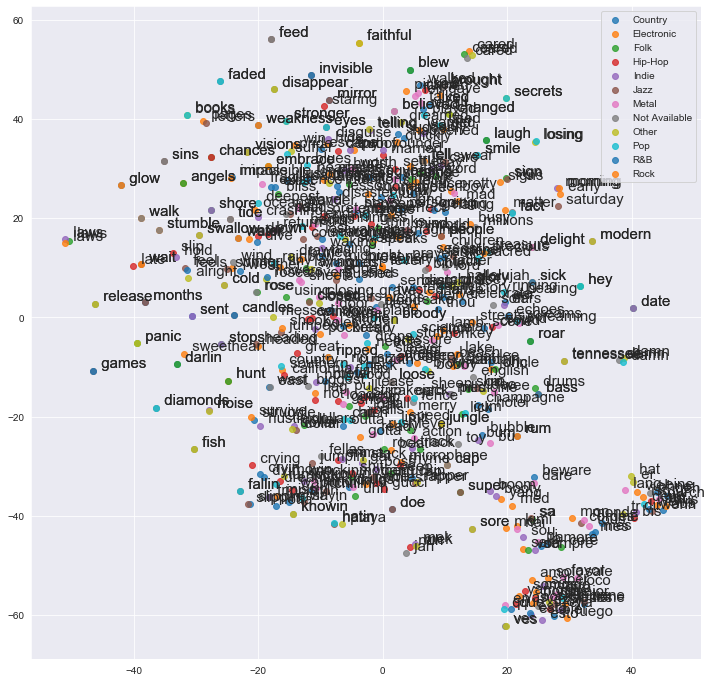

In [151]:
plt.figure(figsize=(12,12))

for i,genre in enumerate(genres):
    Y_curr = Y[i*50:(i+1)*50,:]
    p1 = sns.regplot(Y_curr[:,0],Y_curr[:,1], fit_reg=False)
    for line in range(0, Y_curr.shape[0]):
        p1.text(Y_curr[line,0],Y_curr[line,1],'  ' + top50WordsPerGenre[i,line],
                horizontalalignment='left',
                verticalalignment='bottom', size='medium',weight='normal').set_size(15)
plt.legend(genres)

Not sure what to make of it, but there seem to be a few blobs, a big one and a few small ones down to the right. But it doesn't seem there is any clustering by genre

## Text Classification
In this section, you'll build a text classifier, determining the genre of a song based on its lyrics.

### Text classification using Bag-of-Words
Build a Naive Bayes classifier based on the bag of Words.  
You will need to divide your dataset into a train and test sets.

In [15]:
data = train[train.clean_lyrics.map(lambda d: len(d))>0]

In [16]:
trainset, testset = train_test_split(data, test_size=0.1)

In [19]:
vectorizer = CountVectorizer(stop_words='english', max_features=3000)
trainFreqWords = vectorizer.fit_transform(trainset.clean_lyrics.apply(lambda x: (' '.join(x))).values)
testFreqWords= vectorizer.transform(testset.clean_lyrics.apply(lambda x: (' '.join(x))).values)

In [20]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(trainFreqWords,trainset.genre.values)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
clf.score(testFreqWords,testset.genre.values)

0.3389249095295537

Show the confusion matrix.

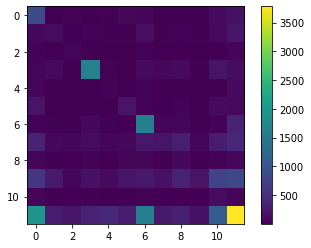

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred = clf.predict(testFreqWords)
plt.imshow(confusion_matrix(testset.genre.values, y_pred))
plt.colorbar()

Show the classification report - precision, recall, f1 for each class.

In [23]:
from sklearn.metrics import classification_report
print(classification_report(testset.genre.values, y_pred))

               precision    recall  f1-score   support

      Country       0.20      0.63      0.30      1378
   Electronic       0.14      0.15      0.15       855
         Folk       0.10      0.23      0.14       219
      Hip-Hop       0.65      0.65      0.65      2525
        Indie       0.05      0.12      0.07       327
         Jazz       0.20      0.26      0.22       771
        Metal       0.38      0.69      0.49      2375
Not Available       0.24      0.09      0.13      2355
        Other       0.06      0.17      0.09       502
          Pop       0.36      0.05      0.09      4013
          R&B       0.04      0.38      0.08       337
         Rock       0.60      0.35      0.44     10871

     accuracy                           0.34     26528
    macro avg       0.25      0.31      0.24     26528
 weighted avg       0.44      0.34      0.34     26528



Pretty poor results on most genres, aside from hip hop and rock. They might be most distinguishable in terms of lyrics than the rest. Also the set is imbalanced...

### Text classification using Word Vectors
#### Average word vectors
Do the same, using a classifier that averages the word vectors of words in the document.

In [24]:
def makeFeatureVec(words, model, num_features):

    featureVec = np.zeros((num_features,))

    nwords = 0
    
    index2word_set = set(model.wv.index2word)
    
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1
            featureVec = np.add(featureVec,model.wv[word])

    if featureVec.sum()!=0:
        featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):

    reviewFeatureVecs = np.zeros((len(reviews),num_features))

    for i, review in enumerate(reviews):

        if i%1000 == 0:
            print ("Review %d of %d" % (i, len(reviews)))
       
        reviewFeatureVecs[i] = makeFeatureVec(review, model, num_features)

    return reviewFeatureVecs

In [25]:
trainDataVecs = getAvgFeatureVecs(trainset.clean_lyrics, w2v_model, 300)

Review 0 of 238749
Review 1000 of 238749
Review 2000 of 238749
Review 3000 of 238749
Review 4000 of 238749
Review 5000 of 238749
Review 6000 of 238749
Review 7000 of 238749
Review 8000 of 238749
Review 9000 of 238749
Review 10000 of 238749
Review 11000 of 238749
Review 12000 of 238749
Review 13000 of 238749
Review 14000 of 238749
Review 15000 of 238749
Review 16000 of 238749
Review 17000 of 238749
Review 18000 of 238749
Review 19000 of 238749
Review 20000 of 238749
Review 21000 of 238749
Review 22000 of 238749
Review 23000 of 238749
Review 24000 of 238749
Review 25000 of 238749
Review 26000 of 238749
Review 27000 of 238749
Review 28000 of 238749
Review 29000 of 238749
Review 30000 of 238749
Review 31000 of 238749
Review 32000 of 238749
Review 33000 of 238749
Review 34000 of 238749
Review 35000 of 238749
Review 36000 of 238749
Review 37000 of 238749
Review 38000 of 238749
Review 39000 of 238749
Review 40000 of 238749
Review 41000 of 238749
Review 42000 of 238749
Review 43000 of 238749
R

In [26]:
testDataVecs = getAvgFeatureVecs(testset.clean_lyrics, w2v_model, 300)

Review 0 of 26528
Review 1000 of 26528
Review 2000 of 26528
Review 3000 of 26528
Review 4000 of 26528
Review 5000 of 26528
Review 6000 of 26528
Review 7000 of 26528
Review 8000 of 26528
Review 9000 of 26528
Review 10000 of 26528
Review 11000 of 26528
Review 12000 of 26528
Review 13000 of 26528
Review 14000 of 26528
Review 15000 of 26528
Review 16000 of 26528
Review 17000 of 26528
Review 18000 of 26528
Review 19000 of 26528
Review 20000 of 26528
Review 21000 of 26528
Review 22000 of 26528
Review 23000 of 26528
Review 24000 of 26528
Review 25000 of 26528
Review 26000 of 26528


In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(trainDataVecs,trainset.genre.values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Show the confusion matrix.

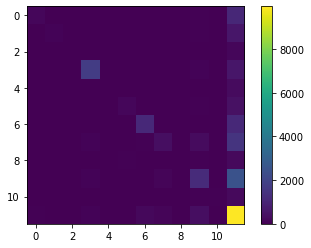

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred = clf.predict(testDataVecs)
plt.imshow(confusion_matrix(testset.genre.values, y_pred))
plt.colorbar()

Show the classification report - precision, recall, f1 for each class.

In [29]:
from sklearn.metrics import classification_report
print(classification_report(testset.genre.values, y_pred))

               precision    recall  f1-score   support

      Country       0.64      0.12      0.21      1378
   Electronic       0.85      0.13      0.23       855
         Folk       0.76      0.13      0.22       219
      Hip-Hop       0.82      0.70      0.76      2525
        Indie       0.74      0.06      0.11       327
         Jazz       0.55      0.23      0.32       771
        Metal       0.77      0.49      0.60      2375
Not Available       0.47      0.16      0.23      2355
        Other       0.36      0.07      0.12       502
          Pop       0.53      0.30      0.39      4013
          R&B       0.62      0.13      0.22       337
         Rock       0.53      0.92      0.67     10871

     accuracy                           0.57     26528
    macro avg       0.64      0.29      0.34     26528
 weighted avg       0.59      0.57      0.52     26528



In [1]:
import dill

In [31]:
dill.dump_session('session.pkl')

In [2]:
dill.load_session('session.pkl')

#### TfIdf Weighting
Do the same, using a classifier that averages the word vectors of words in the document, weighting each word by its TfIdf.


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
num_features = 5000

In [129]:
tfidf = TfidfVectorizer(vocabulary=w2v_model.wv.index2entity[:num_features], stop_words='english')
tf = tfidf.fit_transform(trainset.clean_lyrics.apply(lambda x: (' '.join(x))).values)
embeddings = w2v_model.wv.vectors[:num_features]

temp = tf.toarray()
valid_rows = ~(temp==0).all(1)

avg = (tf[valid_rows] @ embeddings) / np.sum(tf[valid_rows], axis=1)

In [130]:
avg.shape

(238361, 300)

In [133]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(avg,trainset[valid_rows].genre.values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
tf = tfidf.fit_transform(testset.clean_lyrics.apply(lambda x: (' '.join(x))).values)
temp = tf.toarray()
valid_rows = ~(temp==0).all(1)

avg_test = (tf[valid_rows] @ embeddings) / np.sum(tf[valid_rows], axis=1)

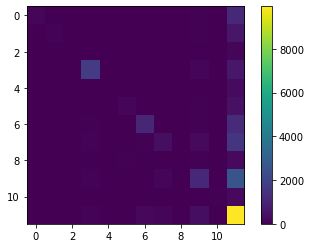

In [136]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred = clf.predict(avg_test)
plt.imshow(confusion_matrix(testset[valid_rows].genre.values, y_pred))
plt.colorbar()

In [137]:
print(classification_report(testset[valid_rows].genre.values, y_pred))

               precision    recall  f1-score   support

      Country       0.67      0.13      0.21      1378
   Electronic       0.81      0.13      0.23       850
         Folk       0.79      0.12      0.21       219
      Hip-Hop       0.81      0.68      0.74      2523
        Indie       0.75      0.06      0.12       327
         Jazz       0.55      0.22      0.31       770
        Metal       0.76      0.44      0.56      2366
Not Available       0.45      0.15      0.23      2349
        Other       0.35      0.06      0.11       502
          Pop       0.51      0.29      0.37      4010
          R&B       0.60      0.12      0.20       337
         Rock       0.52      0.92      0.67     10860

     accuracy                           0.56     26491
    macro avg       0.63      0.28      0.33     26491
 weighted avg       0.58      0.56      0.50     26491



### Text classification using ConvNet
Do the same, using a ConvNet.  
The ConvNet should get as input a 2D matrix where each column is an embedding vector of a single word, and words are in order. Use zero padding so that all matrices have a similar length.  
Some songs might be very long. Trim them so you keep a maximum of 128 words (after cleaning stop words and rare words).  
Initialize the embedding layer using the word vectors that you've trained before, but allow them to change during training.  

Extra: Try training the ConvNet with 2 slight modifications:
1. freezing the the weights trained using Word2vec (preventing it from updating)
1. random initialization of the embedding layer

You are encouraged to try this question on your own.  

You might prefer to get ideas from the paper "Convolutional Neural Networks for Sentence Classification" (Kim 2014, [link](https://arxiv.org/abs/1408.5882)).

There are several implementations of the paper code in PyTorch online (see for example [this repo](https://github.com/prakashpandey9/Text-Classification-Pytorch) for a PyTorch implementation of CNN and other architectures for text classification). If you get stuck, they might provide you with a reference for your own code.